<a href="https://colab.research.google.com/github/Aymericy/Ustyugiov-M/blob/main/lab(4_1)_4_course_Uctiygov_M_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №4.1 (логистическая регрессия)

Создать модель классификации для предсказания того, есть ли у пациента признаки болезни сердца, в зависимости от физических характеристик этого человека (возраст, пол, холестерин и т.д.)



## Imports

**ЗАДАНИЕ: Выполните команду ниже, чтобы импортировать нужные библиотеки.**

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Данные

В таблице heart.cvs содержатся 14 атрибутов о физическом тестировании пациентов. Они сдают кровь и выполняют небольшой физический тест. Колонка "goal" указывает на наличие заболевания сердца у пациента - 0 означает заболевания нет, 1 означает заболевание есть. В общем случае, подтвердить на 100% заболевание сердца это очень инвазивный процесс, поэтому если мы сможем построить модель, которая достаточно точно оценивает вероятность заболевания, то это поможет избежать дорогих инвазивных процедур.

Содержимое

Информация об атрибутах:

* age - возраст
* sex - пол
* cp - chest pain - тип боли в груди (4 значения)
* trestbps - resting blood pressure - давление в состоянии покоя
* chol - уровень холистерина в крови, в mg/dl
* fbs - fasting blood sugar - уровень сахара в крови, > 120 mg/dl
* restecg - resting electrocardiographic results - результаты электрокардиограммы (значнеия 0,1,2)
* thalach - максимальный пульс
* exang - exercise induced angina - возникновение ангины в результате упражнений
* oldpeak = пиковые значения в электрокардиограмме, как результат упражнений (по сравнению с состоянием покоя)
* slope - наклон пикового значения в электрокардиограмме, как результат упражнений (по сравнению с состоянием покоя)
* ca - количество крупных сосудов (0-3), окрашенных флурозопией
* thal -  3 = нормально; 6 = фиксированный дефект; 7 = обратимый дефект
* target - 0 означает отсутствие заболевания сердца, 1 означает наличие заболевания сердца



----

<b>1. Загрузите файл с данными и выведите первые 10 записей</b>

In [24]:
df = pd.read_csv("heart.csv")
df1=df[0:10] #1Sposob
df2 =df.head(10) #2sposob
df2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


### Анализ данных и визуализация данных

 <b>2. Посмотрите, есть ли в наборе данных отсутствующие значения и при необходимости удалите их</b>

In [25]:

df.info()
df1 = df.dropna()
df1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<b> 3.Определите количество значений в каждом классе и сделайте вывод, являются ли классы сбалансированными</b>

In [26]:
df.describe()
# Данные почти сбалансированы ибо значений таргета не равно 165/138.
df2 = df['target'].value_counts()
df2


,count
target,
1,165
0,138


**4. Нарисуйте график pairplot, показывающий связи между следующими колонками и сделайте выводы:**

    ['age','trestbps', 'chol','thalach','target']
   
*Замечание: если запустить pairplot по всем колонкам, то это заняло бы очень много времени, поскольку колонок много.*



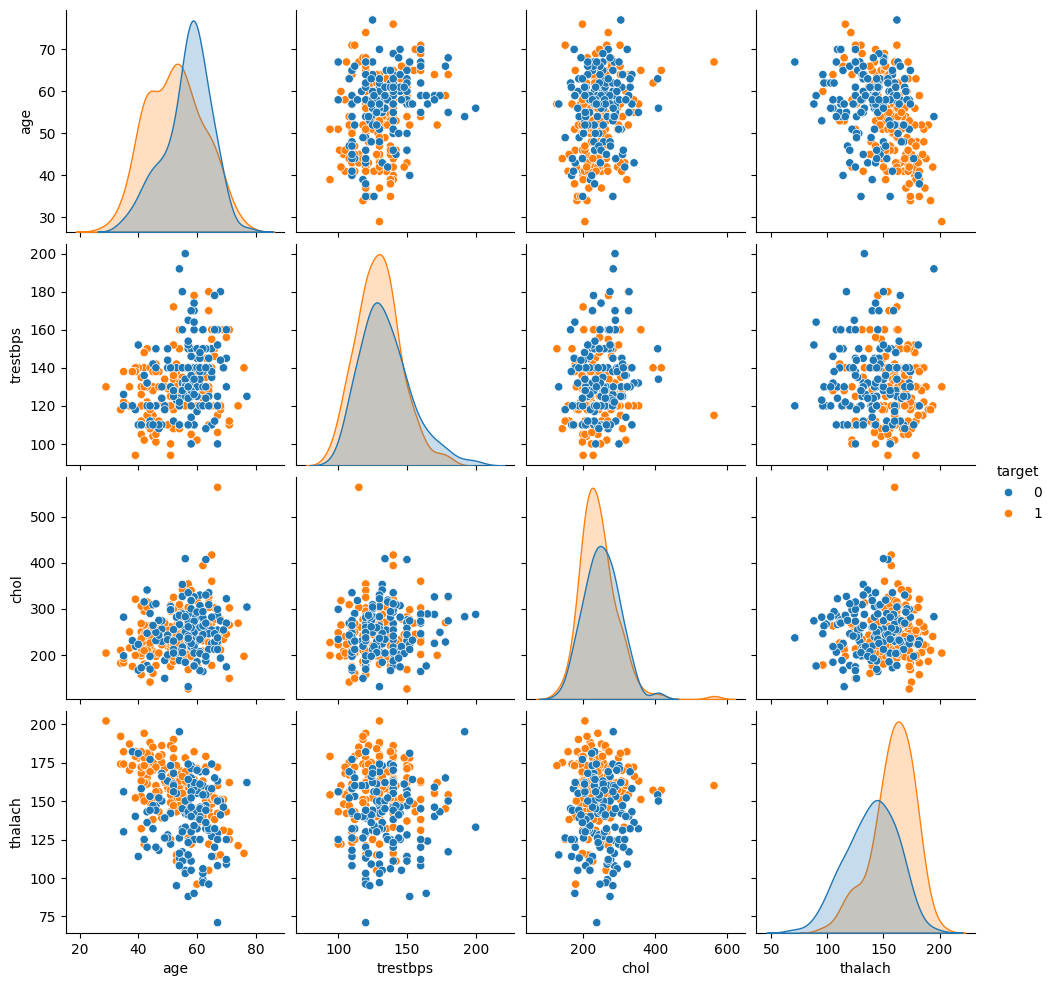

In [27]:
df3 = df[['age','trestbps', 'chol','thalach','target']]
sns.pairplot(df3, hue ="target")
#Вывод данные достаточно неплохо кррелируют между собой

<b> 5.Нарисуйте график heatmap (библиотека Seaborn), показывающий корреляции между всеми колонками.</b>

<Axes: >

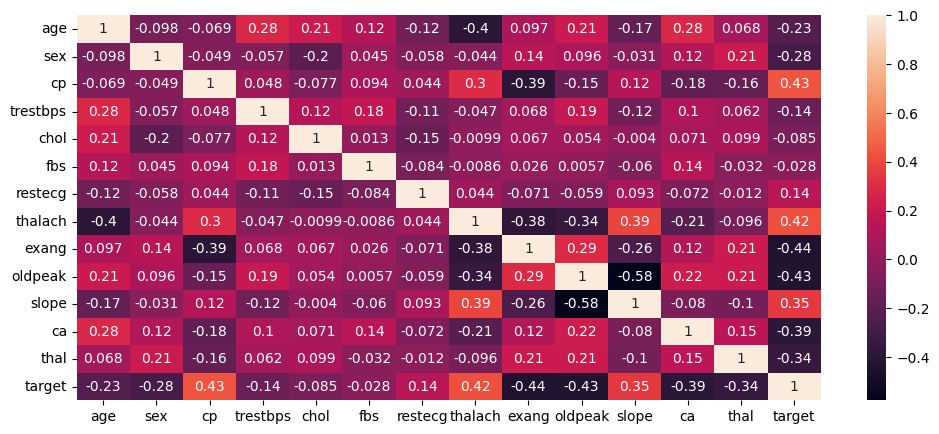

In [28]:
df.corr()
fig, ax = plt.subplots(figsize=(12, 5))
sns.heatmap(df.corr(), annot=True)

----
----

# Машинное обучение

## Разбиение на обучающий и тестовый наборы данных, а также масштабирование данных

**6. Разделите все признаки на 2 объекта, X и y.**

In [29]:

from sklearn.model_selection import train_test_split
X = df.drop('target', axis=1)
y = df['target']
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


**7. Разбейте данные на обучающий и тестовый наборы данных. Для тестовых данных используйте размер 10% и значение random_state=101.**

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**8. С помощью объекта StandardScaler нормализуйте данные признаков в обучающем и тестовом наборах данных. При дальнейшем обучении модели убедитесь, что Вы проводите обучение только на обучающем наборе данных (без утечки данных из тестового набора данных).**

In [31]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)



## Модель логистической регрессии

<b>9.Создайте модель логистической регрессии</b>

In [32]:
lr = LogisticRegression() # Создаем экземпляр класса
lr.fit(X_train, y_train)  # Обучаем на нормализованных
y_pred = lr.predict(X_test) # Делаем предсказание на тестовой выборке
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



**10. Отобразите коэффициенты модели**

In [33]:
print(f"Коэффициенты модели: {lr.coef_}, свободный член: {lr.intercept_}")

Коэффициенты модели: [[-0.07244537 -0.73459575  0.89371356 -0.26249543 -0.21218597  0.04596441
   0.12036576  0.43326353 -0.42823456 -0.52722504  0.38098131 -0.85080651
  -0.57468743]], свободный член: [0.17681761]


---------

## Оценка модели

**11. Оцените работу модели на оставшихся 10% данных - тестовом наборе данных.**

**Подготовьте следующие оценки:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

[[12  3]
 [ 2 14]]
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



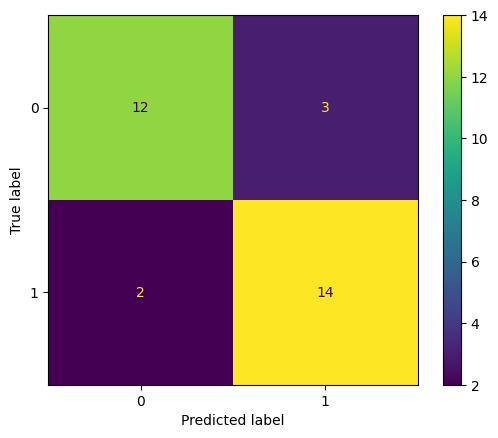

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
a = model_matrix = confusion_matrix(y_test, y_pred, labels = [0,1])
b = ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred);
c = classification_report(y_test, y_pred)
print(a)
print(b)
print(c)

### Кривые производительности

**12. Постройте ROC-кривую и оцените ее площадь**

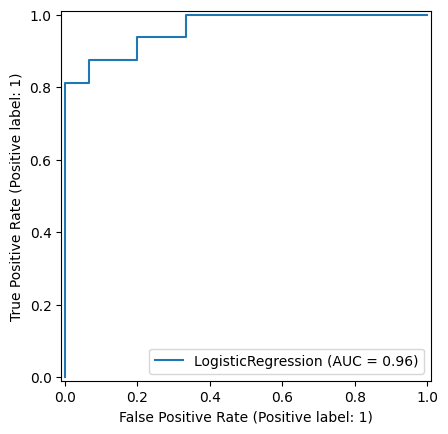

In [35]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(lr,X_test,y_test)

**13. В офис клиники пришёл пациент со следующими значениями признаков:**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

**Добавьте данного пациента в тестовый датасет X_test. Убедитесь, что строка добавлена. Выполните прогнозирование и определите, есть у нового пациента заболевание сердца.**



In [36]:
# Пример данных о пациенте Х
patient = [[48. ,0. ,   2. , 130. , 275. ,   0. ,   1. , 139. ,   0. ,
          0.2,   2. ,   0. ,   2. ]]
X_test
A = np.insert(X_test, [0], [48. ,0. ,   2. , 130. , 275. ,   0. ,   1. , 139. ,   0. , 0.2,   2. ,   0. ,   2. ], axis=0)
A
y_pred = lr.predict(A)
if y_pred[0] == 0:
  print(f"{y_pred[0]}- Заболевания нет")
else:
  print(f"{y_pred[0]}- Заболевания есть")

#Вывод - заболивания сердца у нового пациента нет



0- Заболевания нет
